<a href="https://colab.research.google.com/github/ImaneHoum/ML-network/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix


In [24]:

df1 = pd.read_csv('dataset/Xtrain.csv')
df2 = pd.read_csv('dataset/Ytrain.csv')
#df2.iloc[:, 1].head(n=11)
df = pd.concat([df1, df2.iloc[:, 1]], axis=1)
df.head(n=11)

date  train  way station      hour  composition  p1q0  p2q0  p3q0  \
0   2019-01-07      1    0      AD  06:00:00            2   NaN   NaN   NaN   
1   2019-01-08      1    0      AD  06:00:00            2   NaN   NaN   NaN   
2   2019-01-10      1    0      AD  06:00:00            2   NaN   NaN   NaN   
3   2019-01-11      1    0      AD  06:00:00            2   NaN   NaN   NaN   
4   2019-01-14      1    0      AD  06:00:00            2   NaN   NaN   NaN   
5   2019-01-15      1    0      AD  06:00:00            2   NaN   NaN   NaN   
6   2019-01-17      1    0      AD  06:00:00            2   NaN   NaN   NaN   
7   2019-01-18      1    0      AD  06:00:00            2   NaN   NaN   NaN   
8   2019-01-21      1    0      AD  06:00:00            2   NaN   NaN   NaN   
9   2019-01-22      1    0      AD  06:00:00            2   NaN   NaN   NaN   
10  2019-01-23      1    0      AD  06:00:00            2   NaN   NaN   NaN   

     p0q1   p0q2   p0q3   p0q0  
0   0.201  0.138  0.091  0.216  
1   0.204  0.152  0.106  0.216  
2   0.213  0.153  0.111  0.227  
3   0.213  0.152  0.108  0.229  
4   0.210  0.147  0.096  0.225  
5   0.218  0.154  0.106  0.238  
6   0.209  0.140  0.094  0.228  
7   0.207  0.141  0.104  0.217  
8   0.234  0.149  0.111  0.258  
9   0.223  0.151  0.102  0.242  
10  0.225  0.150  0.113  0.244

In [25]:
df.columns[df.isnull().any()].tolist()

['hour', 'p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

[]

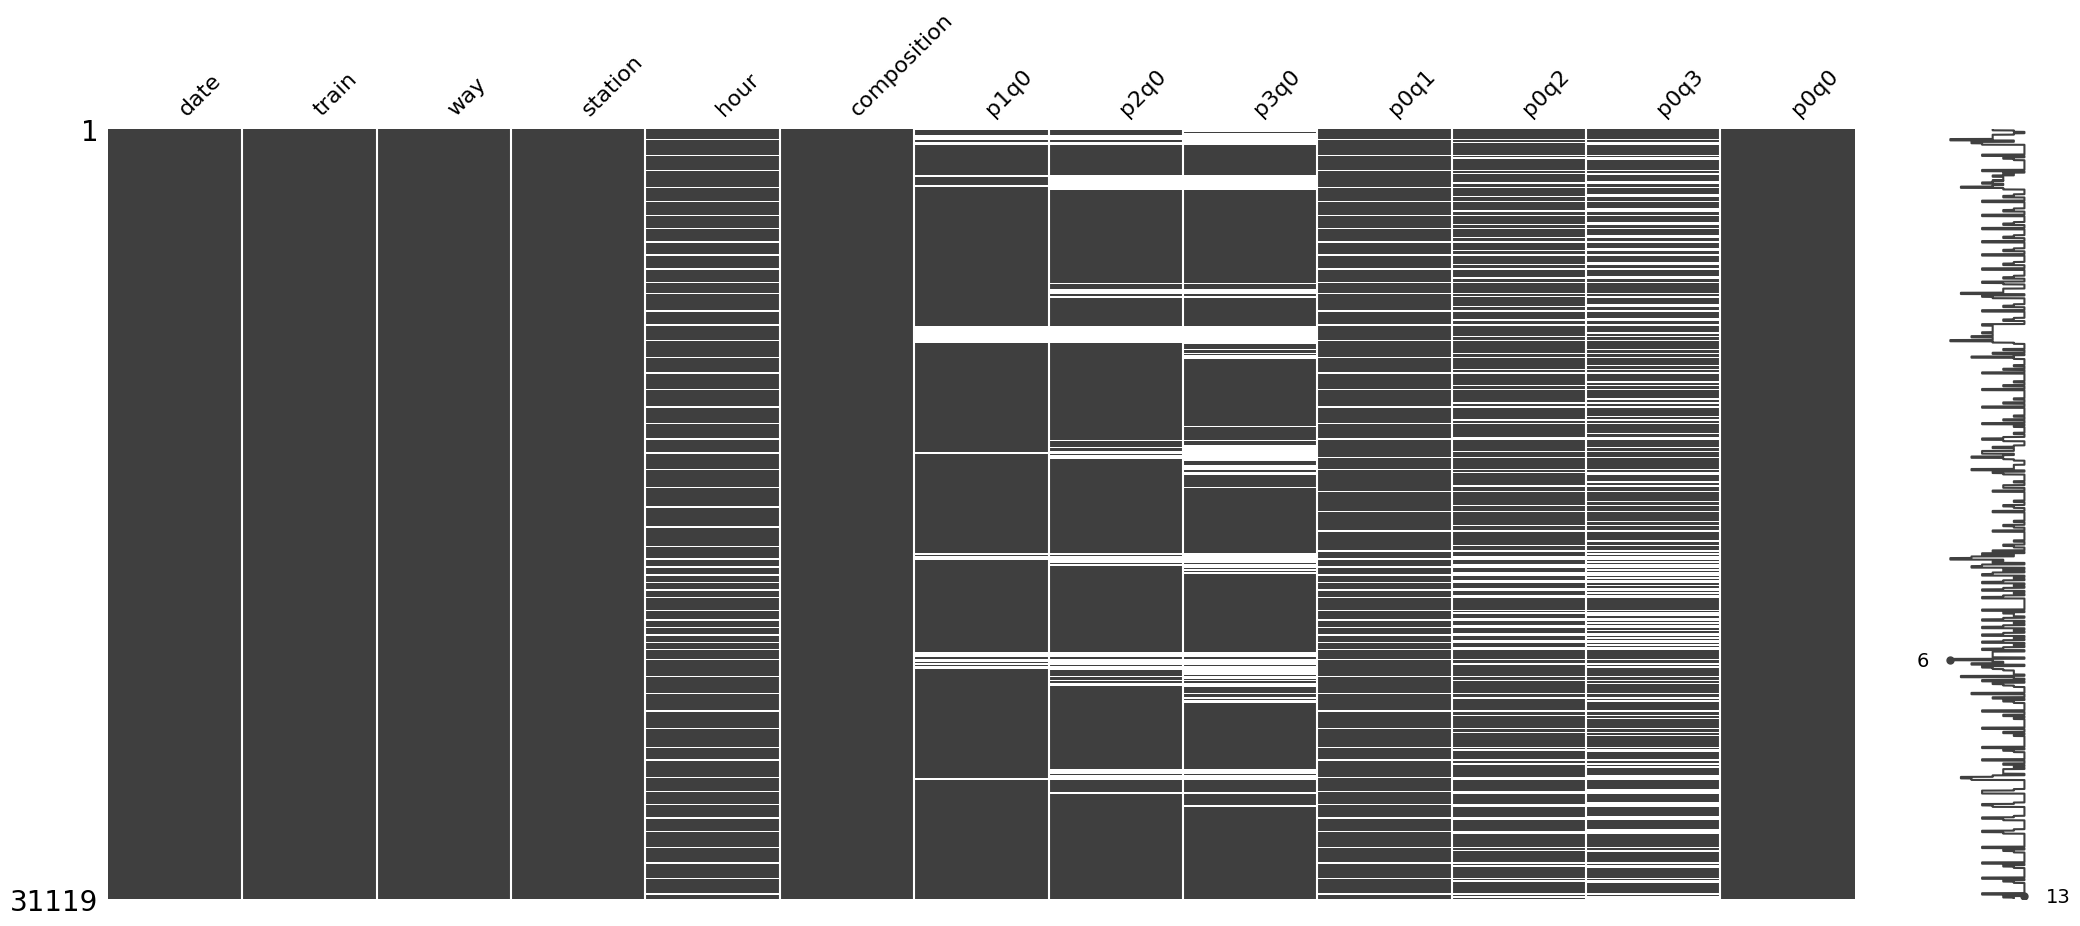

In [31]:
msno.matrix(df)



(17666, 13)

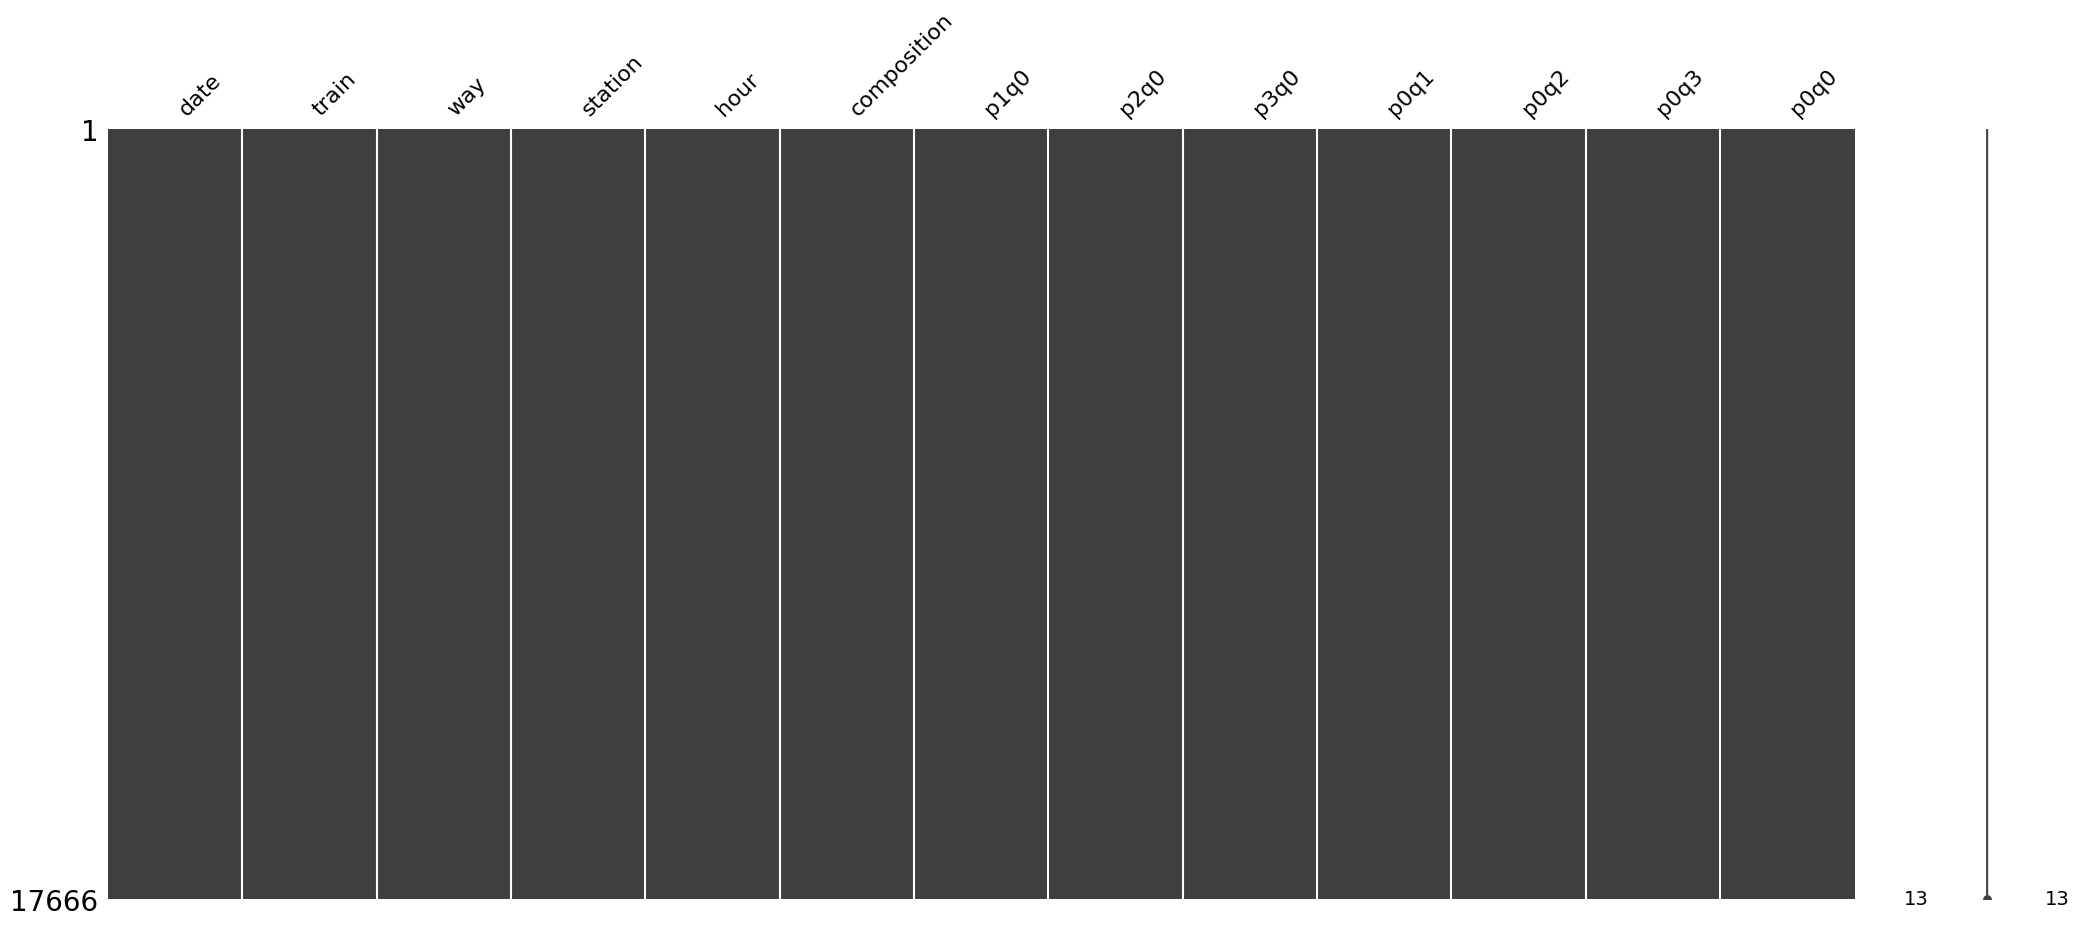

In [37]:
#we can try removing the missing values and see if it affects the results
df_nonull = df.dropna()
df_nonull.columns[df_nonull.isnull().any()].tolist()
msno.matrix(df_nonull)
df_nonull.shape

In [ ]:
# OR we replace the missing value with another value (kinda tamper the database)

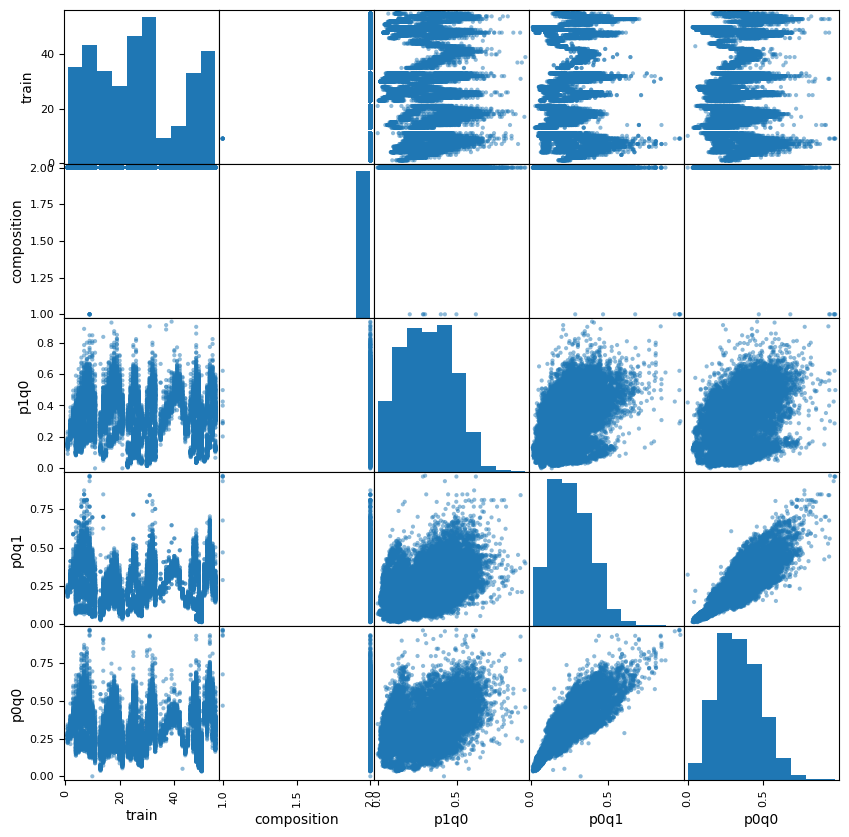

In [38]:
columns_to_plot = ['train','composition',
                        'p1q0',
                        'p0q1','p0q0','hour',
                        ]
sm = scatter_matrix(df_nonull[columns_to_plot],
                   figsize=(10,10))

plt.show()

<Axes: title={'center': 'p1q0'}, xlabel='train'>

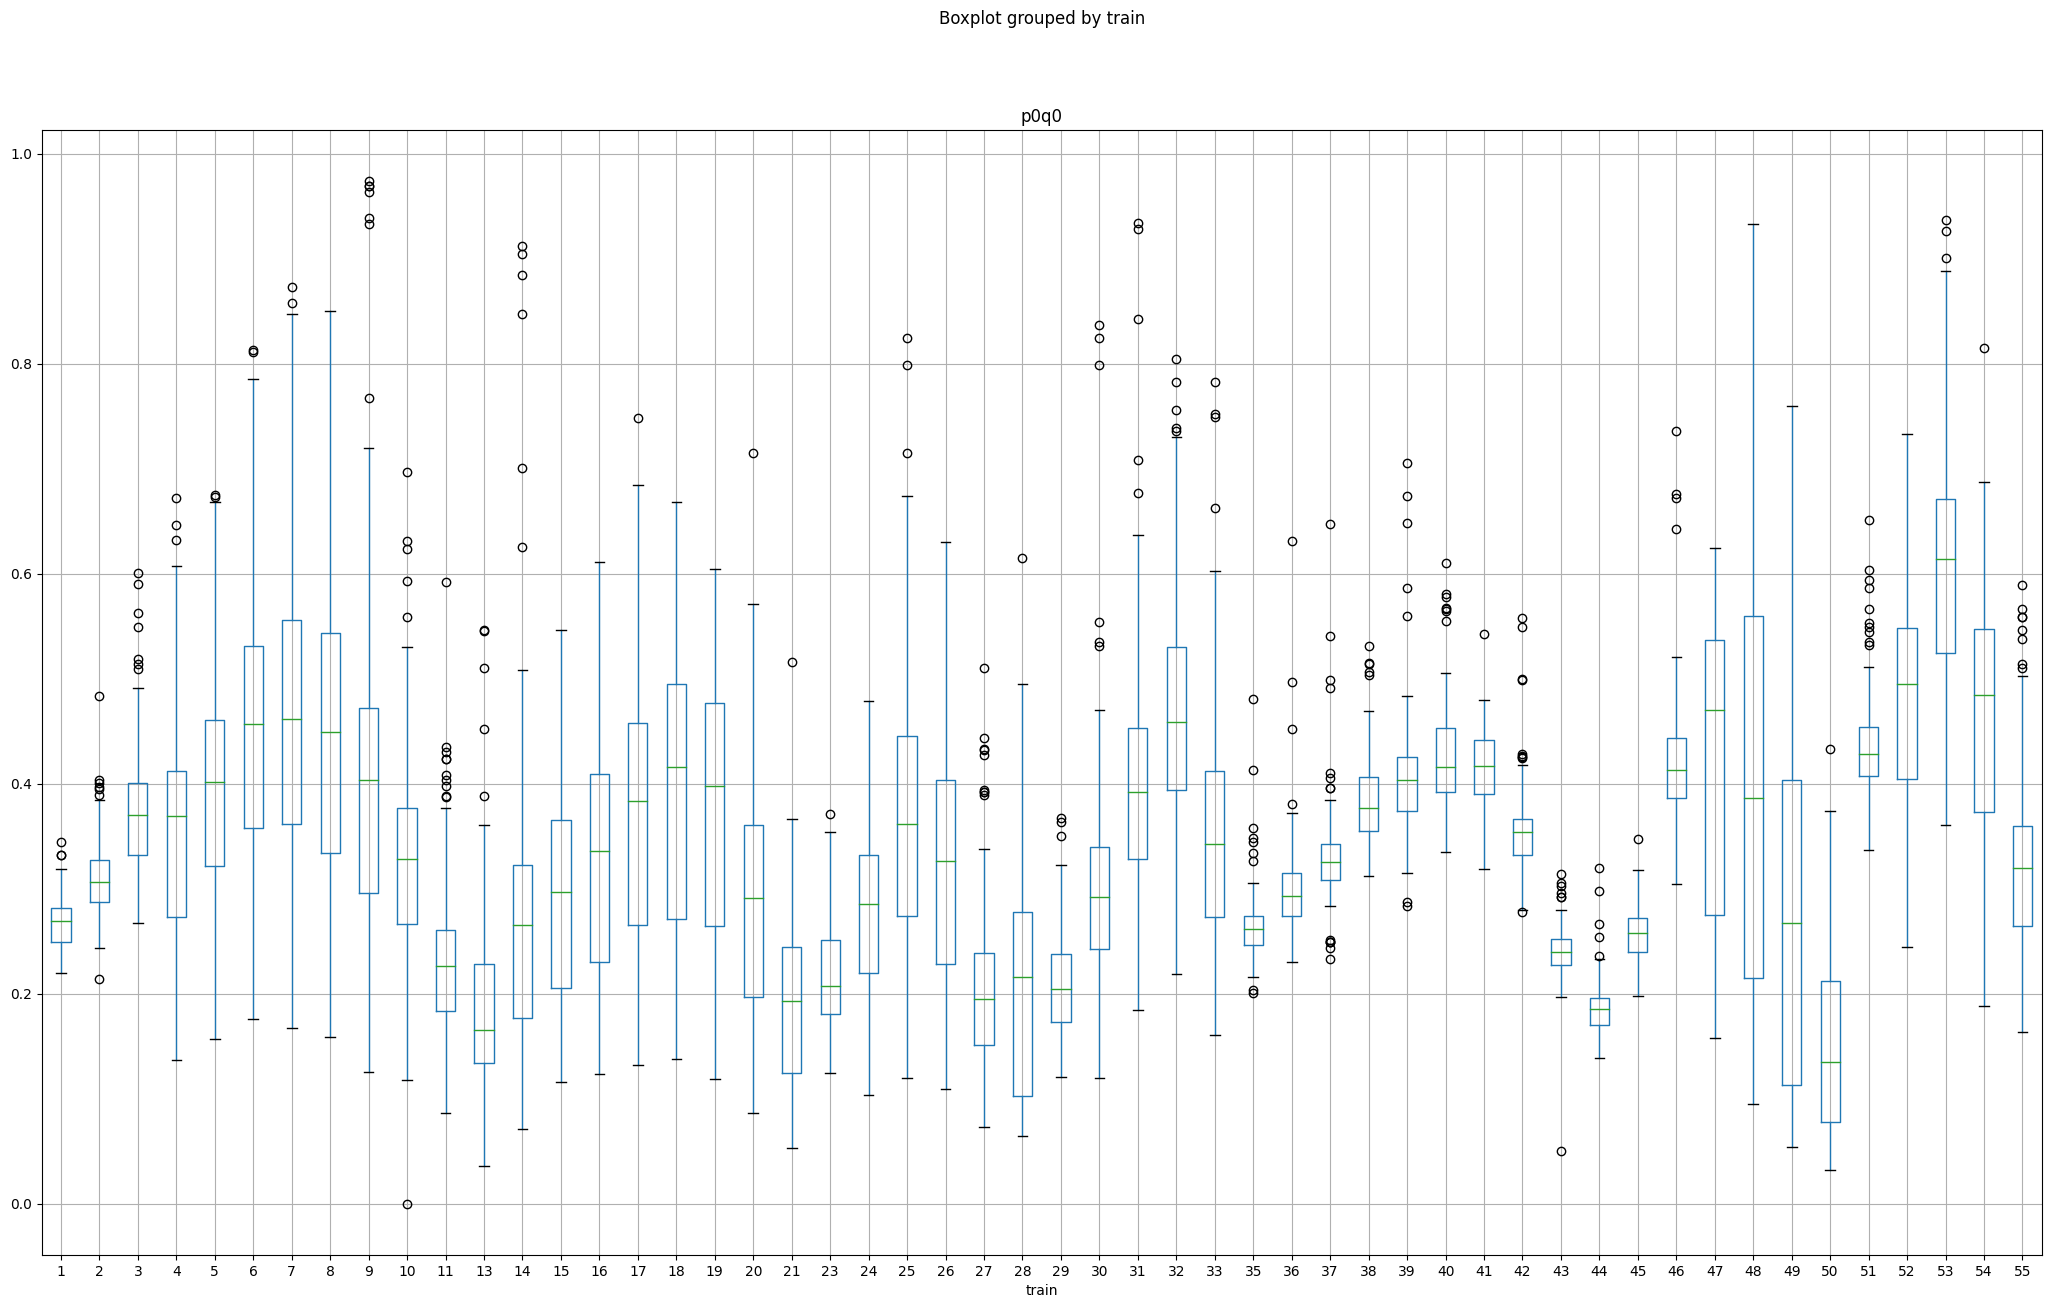

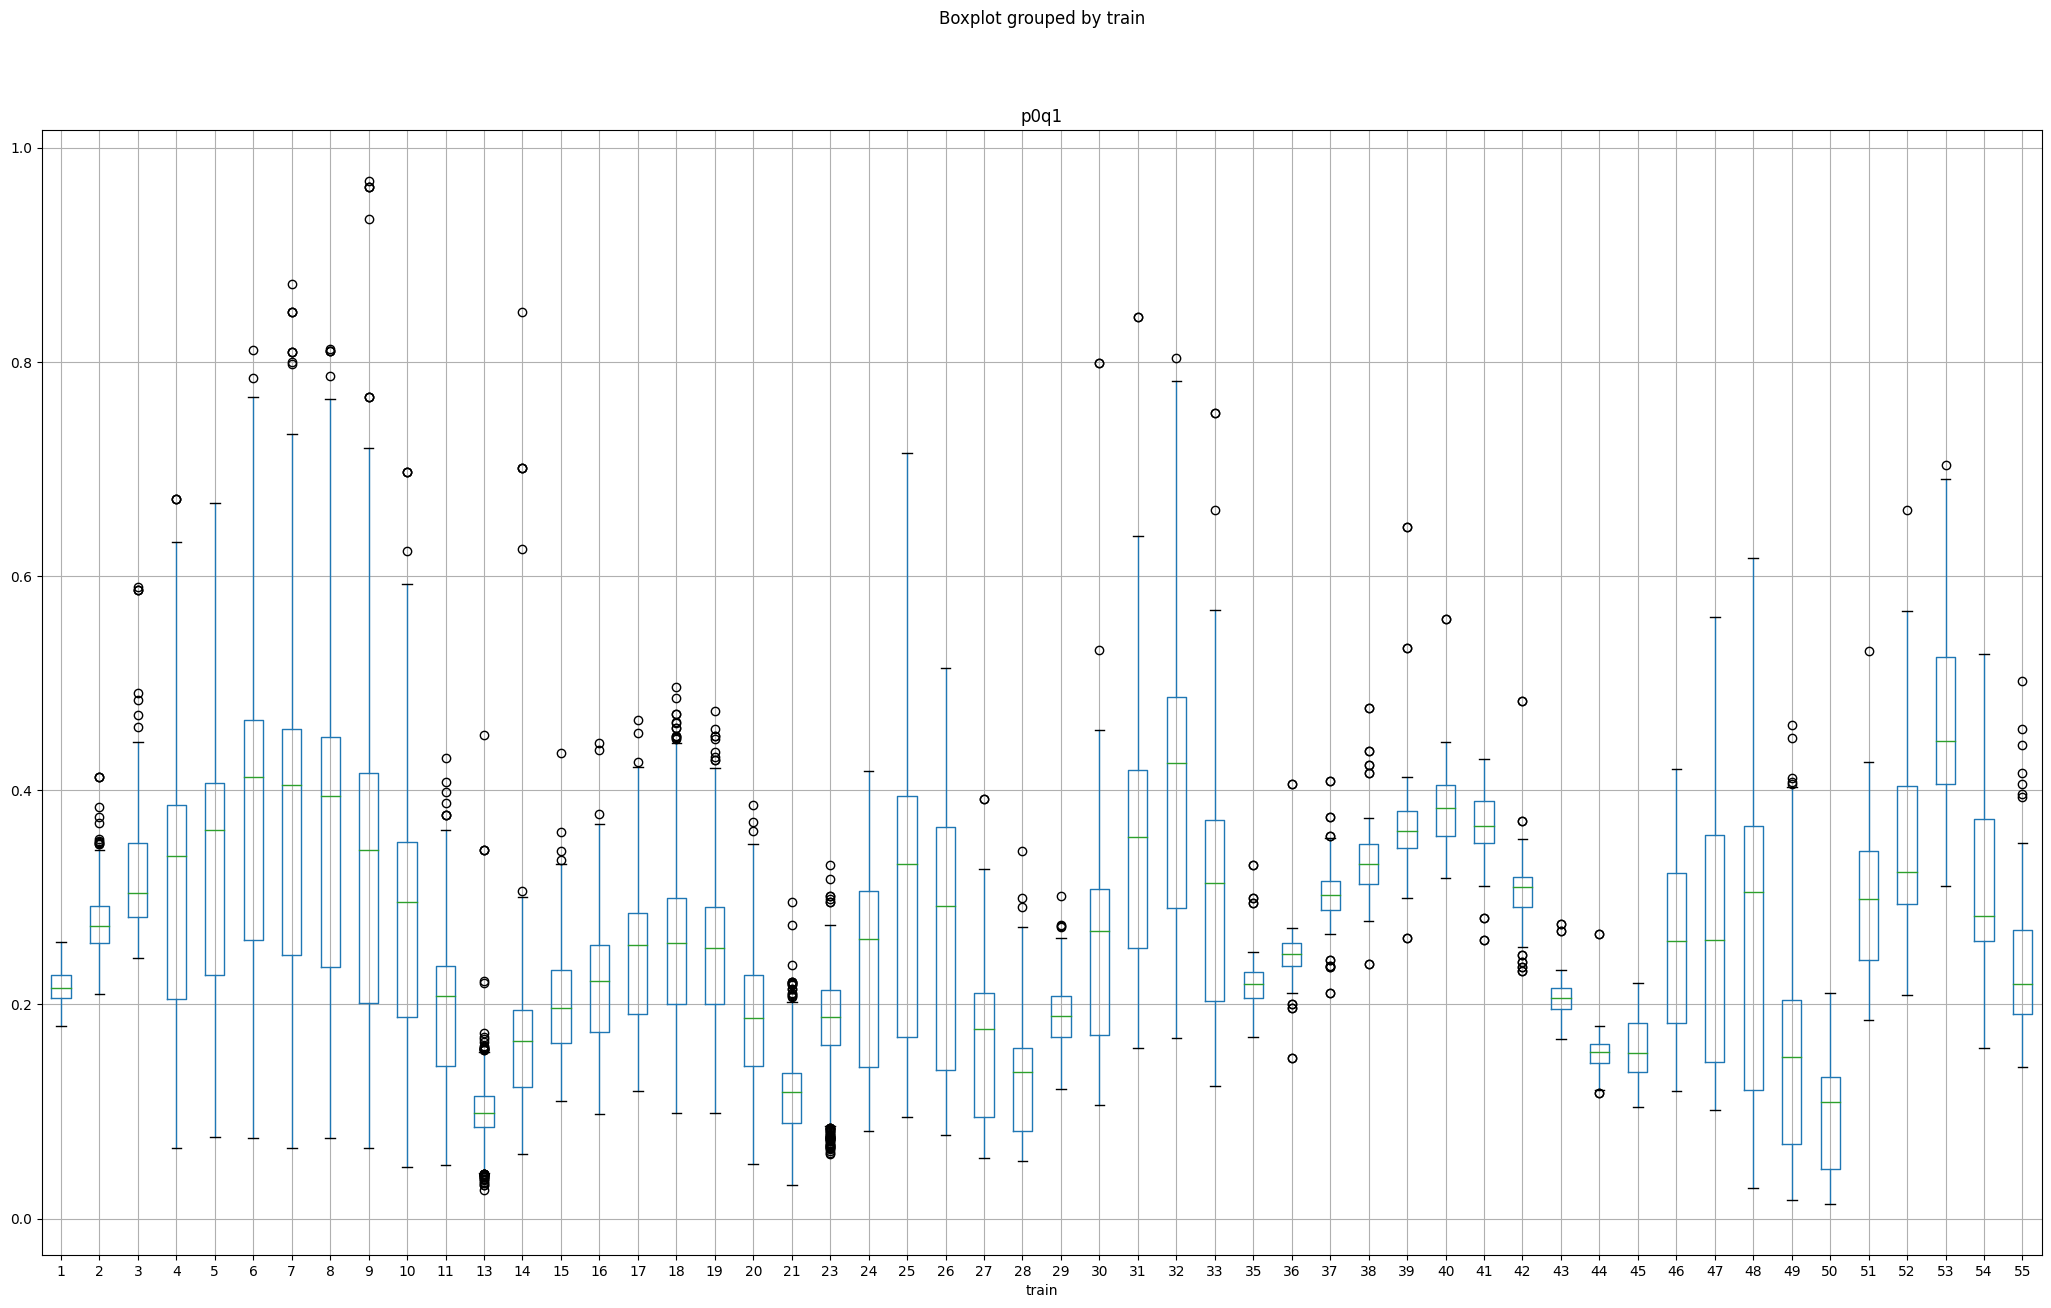

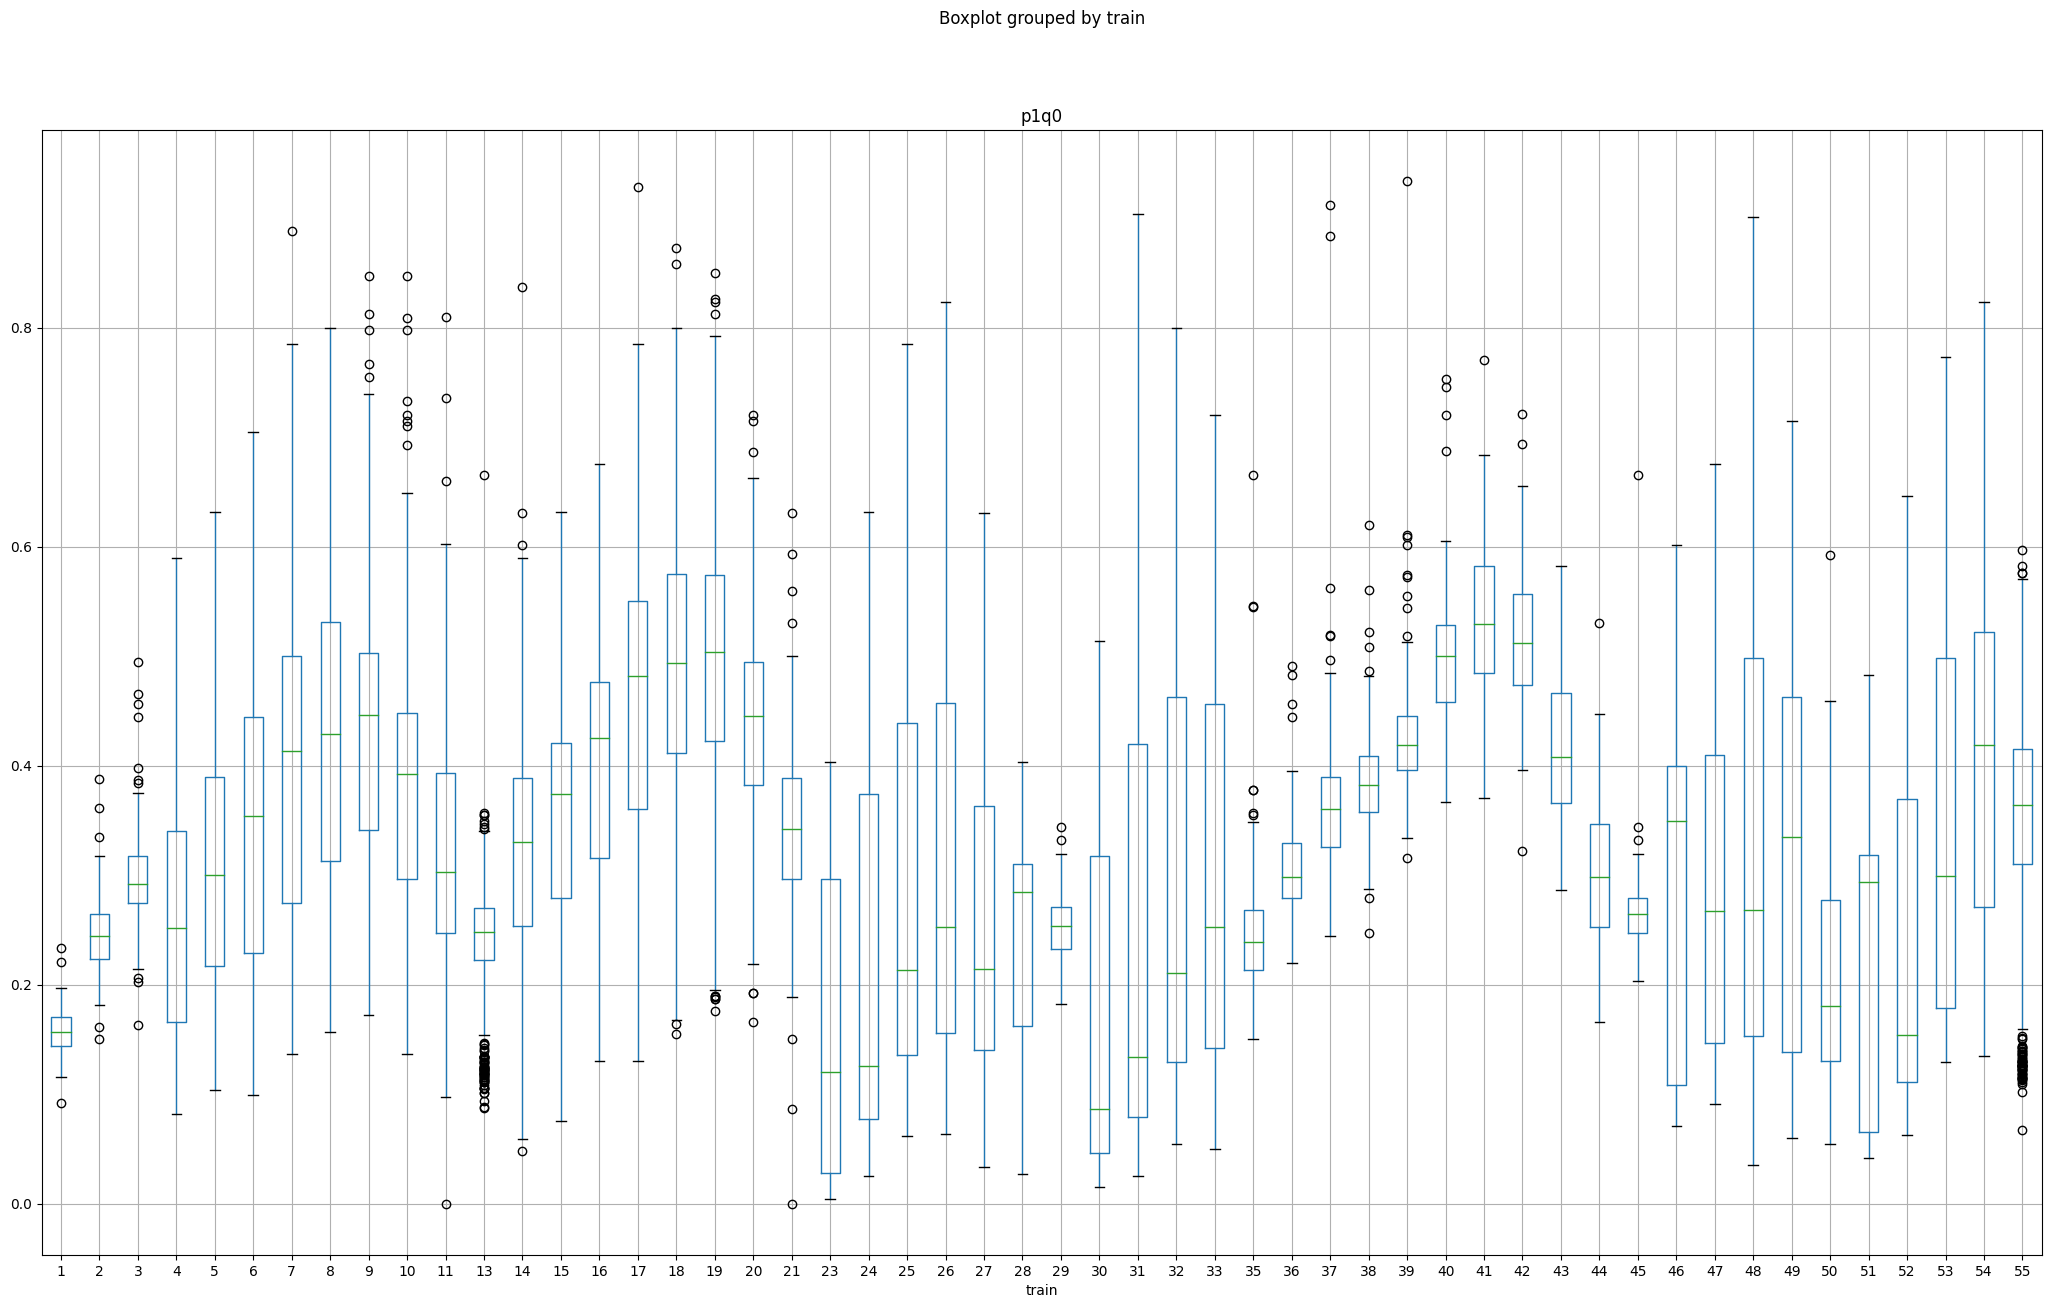

In [39]:
df_nonull.boxplot(column=['p0q0'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p0q1'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p1q0'], by="train", figsize=(25,15))

In [29]:
columns_to_plot = ['train','composition',
                        'p1q0',
                        'p0q1','p0q0'
                        ]
corrmatrix = df[columns_to_plot].corr()
corrmatrix

train  composition      p1q0      p0q1      p0q0
train        1.000000     0.021263 -0.065208 -0.011038  0.054478
composition  0.021263     1.000000 -0.009150 -0.066497 -0.056660
p1q0        -0.065208    -0.009150  1.000000  0.588293  0.669817
p0q1        -0.011038    -0.066497  0.588293  1.000000  0.877713
p0q0         0.054478    -0.056660  0.669817  0.877713  1.000000